### Importing libraries :

In [49]:
import numpy as np
import cvxpy as cp
import cylp
import timeit
import matplotlib.pyplot as plt

### Fonction generator :

In [50]:
def generator(n):
   w = np.array([])
   W = np.array([])
   c = np.array([])
   Poids = np.random.uniform(50,100)
   W = np.append(W, Poids, axis=None)
   for i in range(n):
      poids = np.random.uniform(1,10)
      w = np.append(w, poids, axis=None)
      utility = np.random.uniform(1,100)
      c = np.append(c, utility, axis=None)
   return W, w, c

### Input :

In [51]:
n = int(input("Donner le nombre d'objets :"))
W,w,c = generator(n)
x = cp.Variable(n,boolean=True)
print("Le nbr d'objets saisie :",n)
print("La capacité maximale du sac à dos :",W)
print("Les poids des objets :",w)
print("L'utilité de chaque objet :",c)

Le nbr d'objets saisie : 20
La capacité maximale du sac à dos : [77.96812813]
Les poids des objets : [7.32885848 7.88365269 9.24307998 9.44677496 8.24363069 8.35455707
 9.59080321 5.88501202 3.72543749 4.70402642 2.13446718 1.41081869
 6.50187933 5.09730891 4.97556511 8.41825597 8.56230403 2.75837559
 9.48389089 1.4467436 ]
L'utilité de chaque objet : [92.90624549 73.57649563 58.1123767  68.33257328 23.02491692 85.69068353
 89.07207829 44.28272146  9.28934147 15.36836968 15.89979891 16.97899865
  9.51476339 92.10425973 71.16333765 56.81061731 73.24075473 48.35878222
 84.2298228   5.07511068]


### PL :

In [52]:
P = cp.Problem(cp.Maximize(c@x),[w@x<=W])

###  Output :

on  a choisi de travailler avec les solveurs GLPK et CBC car ils sont dédiés pour la résolution des problèmes MI (mixed integer linear programs) càd les problèmes qui ont des solution sous forme d'un boolean x = {0,1}

##### GLPK:

In [53]:
print("La valeur optimale par le solveur (GLPK) :", P.solve(solver = cp.GLPK_MI))
print("vecteur solution",x.value)

La valeur optimale par le solveur (GLPK) : 811.5538309153326
vecteur solution [1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.]


##### CBC:

In [54]:
print("La valeur optimale par le solveur (CBC)) :", P.solve(solver = cp.CBC))
print("vecteur solution",x.value)

La valeur optimale par le solveur (CBC)) : 811.5538309153326
vecteur solution [1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.]


### Complexité temporelle :

* les vecteurs qui vont stocker les temps d'executions ainsi que les nombres d'objets pour chaque exemple traité : 

In [55]:
t1 = np.array([])  # temps d'execution moyen de chaque nbr d'objet par le solveur GLPK
t2 = np.array([])  # temps d'execution moyen de chaque nbr d'objet par le solveur CBC
nbr_items = np.array([])

* on va calculer le temps d'execution moyen pour chaque nombre d'objets entre (50 et 100), càd pour chaque nombre d'objets on va resoudre le problème 10 fois puis on va calculer le temps d'execution moyen (somme/10).

In [56]:
for i in range(50,100,1):
    a1 = np.array([]) # temps d'execution du meme nbr d'objets 10 fois par les solveur GLPK 
    a2 = np.array([]) # temps d'execution du meme nbr d'objets 10 fois par les solveur CBC
    nbr_items = np.append(nbr_items,i)
    for j in range(10):
        x = cp.Variable(i,boolean=True) # variable de decision boolean x = 1 : si on prend l'objet, x = 0 : sinon
        W,w,c = generator(i)            # generation du : W:poids maximale, w:poids de chaque objet, c: utilitée de chaque objet
        P = cp.Problem(cp.Maximize(c@x),[w@x<=W])   # PL : fonction objectif maximisation de l'utiliitée + contraintes
        
        debut1 = timeit.default_timer()
        P.solve(solver = cp.GLPK_MI)
        fin1 = timeit.default_timer()

        a1=np.append(a1, fin1 - debut1) # calcul temps d'execution de GLPK

        debut2 = timeit.default_timer()
        P.solve(solver = cp.CBC)        # calcul temps d'execution de CBC
        fin2 = timeit.default_timer()

        a2 = np.append(a2, fin2 - debut2)

    t1 = np.append(t1, a1.mean())       # calcul temps moyen d'exectution pour chaque nbr d'objets pour le solveur GLPK
    t2 = np.append(t2, a2.mean())       # calcul temps moyen d'exectution pour chaque nbr d'objets pour le solveur CBC

print("temps d'execution moyen du solveur (GLPK) :",t1)
print("temps d'execution moyen du solveur (CBC) :",t2)
print("les nbr d'objets :",nbr_items)

temps d'execution moyen du solveur (GLPK) : [0.04434922 0.01626911 0.01777391 0.01679648 0.01648067 0.01544879
 0.0152311  0.01702715 0.01846969 0.01795951 0.01857415 0.02006782
 0.03565975 0.03994271 0.02969101 0.03071365 0.0159795  0.03178351
 0.01837545 0.01647874 0.01587049 0.02159001 0.0287899  0.01631192
 0.01975844 0.01978731 0.0214632  0.0221688  0.04044731 0.02024849
 0.03998542 0.02447995 0.02962691 0.01678883 0.01756428 0.02292909
 0.03331294 0.03487223 0.01946254 0.03124617 0.0394006  0.02586836
 0.01862656 0.01663096 0.02776911 0.03478995 0.0333381  0.03265788
 0.05075822 0.0324359 ]
temps d'execution moyen du solveur (CBC) : [0.16950051 0.07232772 0.07667632 0.06552889 0.09555861 0.03904004
 0.07369975 0.08344453 0.12089123 0.05571273 0.08174639 0.0696441
 0.14196955 0.1842461  0.13793391 0.09147825 0.04807995 0.49237259
 0.05605188 0.05367679 0.09741261 0.23236844 0.17745898 0.06174761
 0.08263622 0.07091126 0.09072138 0.09571049 0.08994213 0.05413658
 0.16999833 0.15080

### Comparaison entre les deux solveurs (GLPK)  et (CBC):

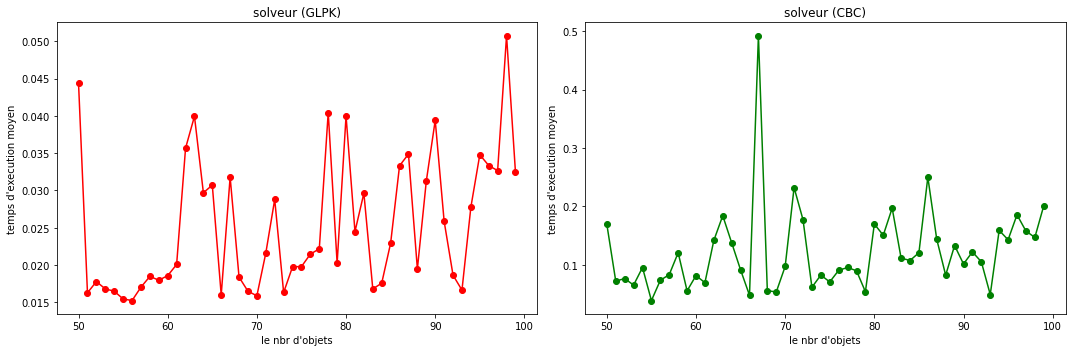

In [57]:
plt.subplots(figsize=(15, 5))
    # solveur (GLPK)
plt.subplot(1, 2, 1)
plt.plot(nbr_items, t1, marker= 'o', color='r')
plt.title("solveur (GLPK)")
plt.xlabel("le nbr d'objets")
plt.ylabel("temps d'execution moyen")
    # solveur (CBC)
plt.subplot(1, 2, 2)
plt.plot(nbr_items, t2, marker= 'o', color='g')
plt.title('solveur (CBC)')
plt.xlabel("le nbr d'objets")
plt.ylabel("temps d'execution moyen")

plt.tight_layout()
plt.show()

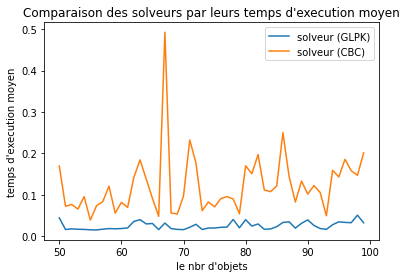

In [58]:
plt.plot(nbr_items, t1, label="solveur (GLPK)")
plt.plot(nbr_items, t2, label="solveur (CBC)")

plt.xlabel("le nbr d'objets")
plt.ylabel("temps d'execution moyen")
plt.title("Comparaison des solveurs par leurs temps d'execution moyen")
plt.legend(["solveur (GLPK)","solveur (CBC)"])

plt.show()

### Conclusion :

* Apres la comparaison avec les memes conditions (données de départ (nbr d'objets) + meme machine) on peut dire que le solveur 'GLPK' est plus efficace que le solveur 'CBC' (plus rapide).